# Detecting Objects in Images and Videos using Single Shot MultiBox Detector

By : Avani Shukla, Ojas Mehta


# Index

*   Objective
*   Motivation
*   Theory
*   Dataset
*   Model
*   Code
*   Results

#Objective
To detect objects in images and videos.

#Motivation
Object detection is a very interesting field with application in numerous things like autonomous driving, security, medical imaging, automated target recognition etc.

With the recent advancement in deep learning which led to a boost in accuracy as well as decrease in the time per frame has made it much more useful for real world applications.

After the AlexNet was introduced in 2012, the use of ConvNet surged in the field of object detection.

#Region-Based ConvNets:

1) **RCNN:** In RCNN, ~2000 region proposals are created of an image and each is then resized and passed through the AlexNet to extract the features. Then SVM is used to classify the region and multiple class specific bounding box regressors are trained to refine the bounding box proposals using extracted features.



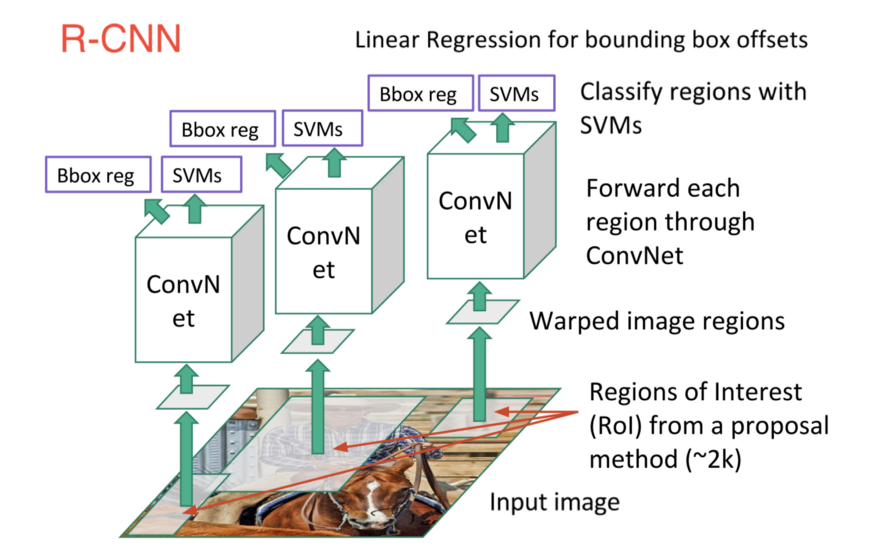

In [0]:
#@title
from IPython.display import Image
Image(filename="/content/drive/My Drive/object_detection/loss/rcnn.png",width=700, height=500)

2) **Fast RCNN:** 
It uses region of proposal method instead of selective search to speed up the process.
Also, instead of passing each of 2000 regions of an image, entire image after ROI projection is passed through the CNN once and then ROI pooling layer is used that extracts features specific to the region. The class prediction which is done by softmax layer and bounding box regressors are then used for each region.
This improved both speed of training and testing but still requires a set of regions to be proposed.


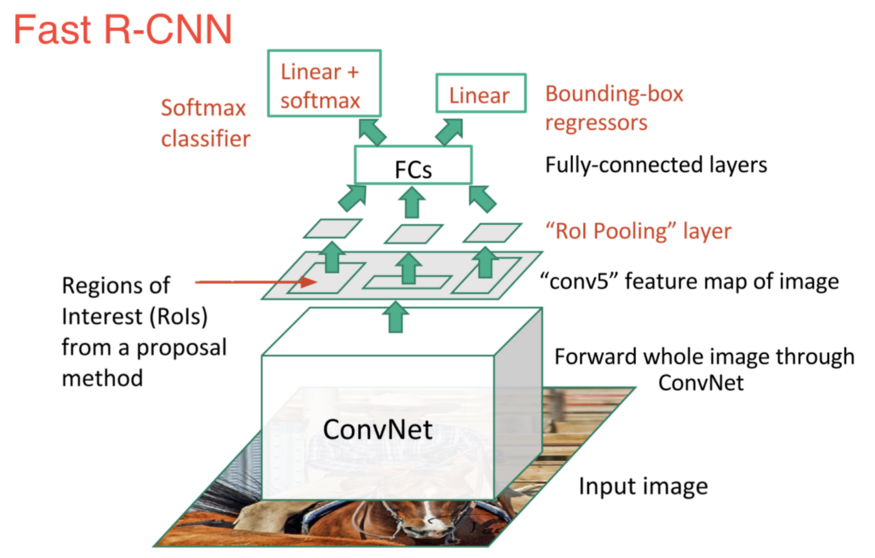

In [0]:
#@title
from IPython.display import Image
Image(filename="/content/drive/My Drive/object_detection/loss/fast rcnn.png",width=700, height=500)


3) **Faster RCNN:** 
It further improved the speed by using a Region proposal Network instead of the region proposal method.  It can be trained to take feature maps as input and give region proposals as output which are then feed into the ROI pooling layer in the Fast RNN.


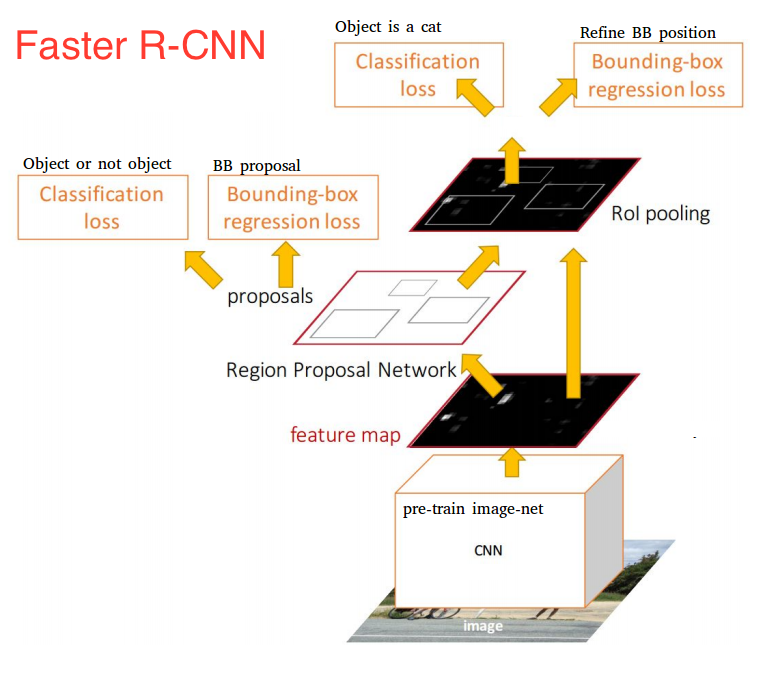

In [0]:
#@title
from IPython.display import Image
Image(filename="/content/drive/My Drive/object_detection/loss/faster rcnn.png",width=700, height=500)


#Single Stage Detection Methods:
1) **YOLO(You Only Look Once):**
It involves a single neural network which takes image as an input and directly predicts the bounding box and classes for each box.
The image is divided in a grid of cells and each cell is responsible for predicting a bounding box involving its position, size, the confidence and also class prediction. The bounding box+confidences and a class probability map are then combined to give final predictions for bounding boxes with class labels.

It is much faster than RCNN but makes prediction with a lower accuracy.

2) **SSD(Single Shot MultiBox Detector):**
It also eliminates the proposal generation for an image and just consist a single network. **It provides accuracy comparable to Region based methods with much higher speed.** It used predictions from multiple feature maps with different resolutions to handle the objects of various sizes.
It achieves 72% mAP with 58 FPS for a 300 x 300 image on an Nvidia Titan X.



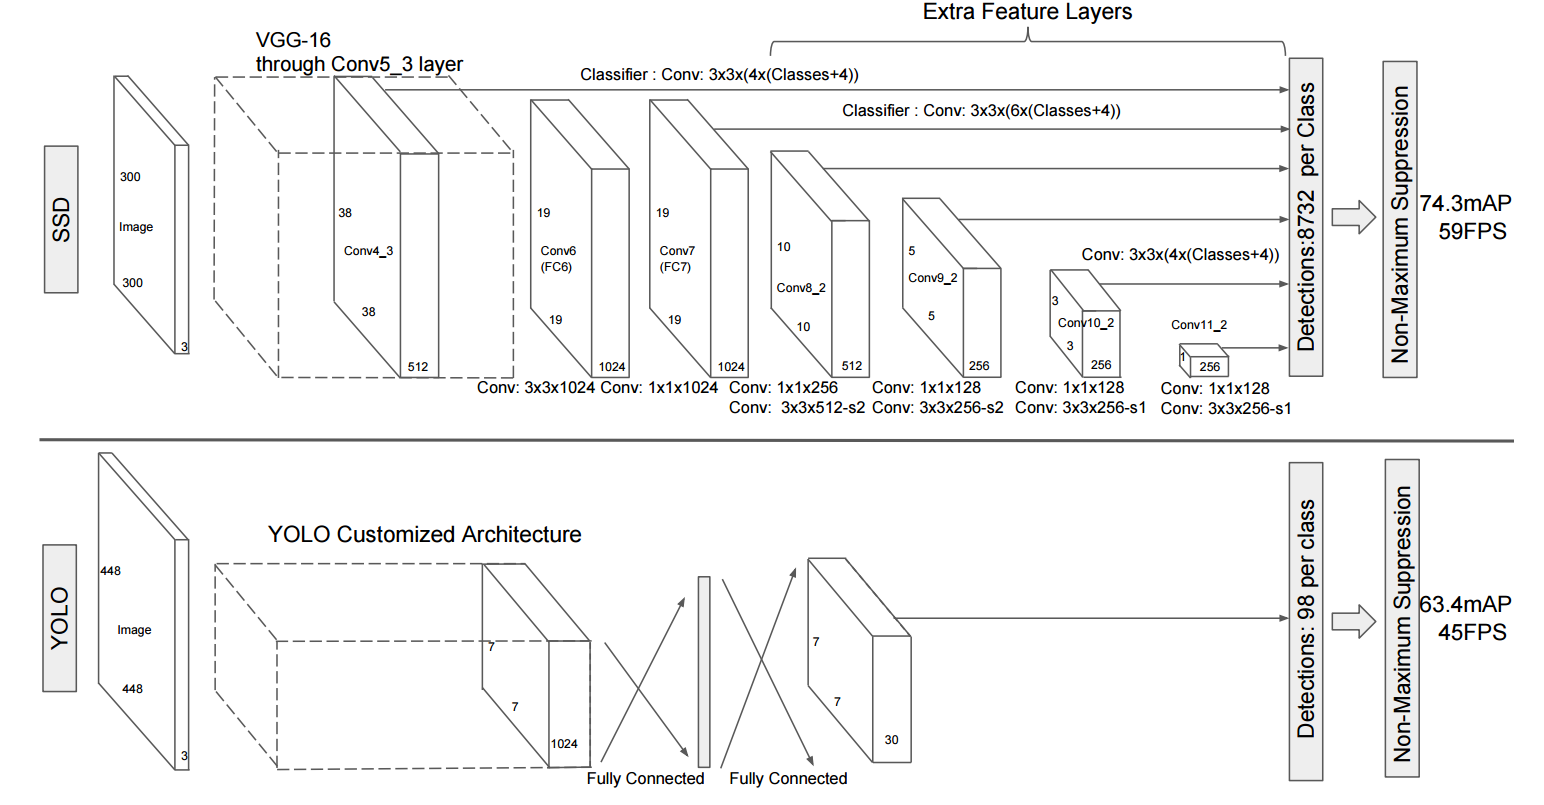

In [0]:
#@title
from IPython.display import Image
Image(filename="/content/drive/My Drive/object_detection/loss/yolovsssd.png",width=800, height=440)


#Dataset
We used the Pasval VOC 2007 Dataset. The link to the page is: 
http://host.robots.ox.ac.uk/pascal/VOC/voc2007/

The dataset has 20 classes. The distribution of images among them which is used for training is as following.


#Model
As discussed that SSD provides accuracy comparable to that of region based methods with much higher speed, hence, it is chosen for the following experiment. \\

The model used is a tensorflow model "ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync" pretrained on the COCO dataset. The link to the dataset is the following:
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md .
 \\
 
The configuration file is ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync.config. Link to download it: https://github.com/tensorflow/models/blob/master/research/object_detection/samples/configs/ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync.config .

#Directory Structure:
* The paths used in the project are given according to this directory structure.
 object_detection \\
  +----- VOC_trainval \\
  |........+------ data \\
  |..................+------ train.record \\
  |..................+------ annotation.csv \\
  |........+------ JPEGImages \\
  |........+------ Imagesets \\
   |..................+------ trainval.txt \\
  |........+------ Annotations \\
  +----- VOC_test \\
  |........+------ data \\
  |..................+------ test.record \\
  |..................+------ annotation.csv \\
  |........+------ JPEGImages \\
  |........+------ Imagesets \\
   |..................+------ test.txt \\
  |........+------ Annotations \\
  |........+------ resultImages \\
  +----- training \\
  +----- ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03 \\
  +----- ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync.config \\
  +----- labelmap.pbtxt \\
  +----- outputEval \\
 
*   'VOC_trainval' is training dataset and 'VOC_test' is test dataset. All the jpeg image files are in 'JPEGImages' , annotation files (.xml) are in the 'Annotations' and that file names are stored in txt file in 'Imagesets'.  'rersultImages' will store final test images result with bounding boxes. 
*   Initially 'training' folder is empty and as we start training, all the models and checkpoints are stored here.
*   'ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03' is tensorflow trained model which you can download from <a href='https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md'>Tensorflow detection model zoo</a>.
* 'ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync.config' is model configuration file. you can get it from <a href="https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs">here</a>.
* 'labelmap.pbtxt' is a label map. It maps an id to a class name.
* 'outputEval' is output directory used to store frozen inference graph. frozen inference graph is generated after training is done. 

# Code


In [0]:
## mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


Following lines will install tensorflow object-detection from github to the notebook.

In [0]:
########following lines for object-detection#########
!apt-get install -y -qq protobuf-compiler python-pil python-lxml
!git clone --quiet https://github.com/tensorflow/models.git
!pip install -e .
import os
import sys
os.chdir('models/research')
!protoc object_detection/protos/*.proto --python_out=.
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
sys.path.append('/content/models/research/slim') #adds to system/env variable
sys.path.append('/content/models/research/slim/nets') #adds to system/env variable
sys.path.append('/content/models/research') #adds to system/env variable
!python object_detection/builders/model_builder_test.py

######install various packages##########
##install it in drive just once
import os, sys
from google.colab import drive
#drive.mount('/content/drive')
nb_path = '/content/notebooks'
#os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)

!pip install --target=$nb_path jdc
!pip install tensorflow --target=$nb_path jdc
!pip install tensorflow-gpu --target=$nb_path jdc
!sudo apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install --target=$nb_path Cython
!pip install --target=$nb_path contextlib2
!pip install --target=$nb_path jupyter
!pip install --target=$nb_path matplotlib
!protoc object_detection/protos/*.proto --python_out=.

Selecting previously unselected package python-bs4.
(Reading database ... 131331 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [0]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np
import tensorflow as tf
import sys
###FOR CREATING TF RECORDS
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import io
from PIL import Image
from collections import namedtuple, OrderedDict
from object_detection.utils import dataset_util
import object_detection.builders

###########Train.py
import functools

from object_detection.builders import dataset_builder
from object_detection.builders import graph_rewriter_builder
from object_detection.builders import model_builder
from object_detection.legacy import trainer
from object_detection.utils import config_util

###Testing###
# %cd /content/models/research/object_detection
import six.moves.urllib as urllib
import tarfile
import zipfile
import pickle 
import json
import shutil

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt

# This is needed since the notebook is stored in the object_detection folder.
# sys.path.append("..")
from object_detection.utils import ops as utils_ops

# This is needed to display the images.
%matplotlib inline

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

W0724 13:36:50.249256 139940291876736 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0724 13:36:50.298826 139940291876736 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0724 13:36:50.317666 139940291876736 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



In [0]:
######Setting Various Path Variables
#directory is a main directory of the project
directory = '/content/drive/My Drive/object_detection/'

#whether you need training data or testing data
train_or_test='VOC_test/'
if train_or_test=='VOC_trainval/':
  image_txt_filepath = directory+ train_or_test + 'ImageSets/trainval.txt'
else:
  image_txt_filepath = directory+ train_or_test + 'ImageSets/test.txt'
  
annotation_xml_filepath = directory+ train_or_test + 'Annotations/'
data_dirpath = directory + train_or_test+ 'data/'
VOC_dirpath = directory + train_or_test
csv_input = data_dirpath + 'annotation.csv'

if train_or_test=='VOC_trainval/':
  output_path = data_dirpath + 'train.record'
else:
  output_path = data_dirpath + 'test.record'
  
image_dir = VOC_dirpath + 'JPEGImages'
pipeline_config_path=directory + 'ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync.config'
output_directory= directory + 'outputEval/'

#after traing is done, find model.ckpt-xxxx file where xxxx is the largest number in the training directory.
trained_checkpoint_prefix= directory + 'training/model.ckpt-21734'
pb_fname = output_directory + 'frozen_inference_graph.pb'
ckpt_train_summary = directory+'training/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = pb_fname

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = directory + 'labelmap.pbtxt'

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
# PATH_TO_TEST_IMAGES_DIR =  os.path.join(repo_dir_path, "test")
PATH_TO_TEST_IMAGES_DIR = directory + 'VOC_test/JPEGImages/'


In [0]:
num_classes=20
class_ind = ['aeroplane','bicycle','bird','boat','bottle','bus','car','cat','chair','cow','diningtable','dog','horse','motorbike','person','pottedplant','sheep','sofa','train','tvmonitor']

In [0]:
#####To get csv files from xml
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member.find('name').text,
                     int(member.find('bndbox').find('xmin').text),
                     int(member.find('bndbox').find('ymin').text),
                     int(member.find('bndbox').find('xmax').text),
                     int(member.find('bndbox').find('ymax').text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df



txtfile = open(image_txt_filepath, 'r')
file_names = txtfile.read().split('\n')
txtfile.close()
print(file_names)

image_path = os.path.join(os.getcwd(), annotation_xml_filepath)
xml_df = xml_to_csv(image_path)
xml_df.to_csv(csv_input, index=None)

In [0]:
#######Create TfeRecords########
# TO-DO replace this with label map
def class_text_to_int(row_label):
    return class_ind.index(row_label)+1


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

writer = tf.python_io.TFRecordWriter(output_path)
examples = pd.read_csv(csv_input)
grouped = split(examples, 'filename')
for group in grouped:
    tf_example = create_tf_example(group, image_dir)
    writer.write(tf_example.SerializeToString())

writer.close()
output_path = os.path.join(os.getcwd(), output_path)
print('Successfully created the TFRecords: {}'.format(output_path))



Successfully created the TFRecords: /content/drive/My Drive/object_detection/VOC_test/data/test.record


#Training
Tensorflow Train.py is used to train the model on Pascal VOC 2007 dataset.

In [0]:
####Tensorflow Train.py##############################
# Copyright 2017 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

r"""Training executable for detection models.
This executable is used to train DetectionModels. There are two ways of
configuring the training job:
1) A single pipeline_pb2.TrainEvalPipelineConfig configuration file
can be specified by --pipeline_config_path.
Example usage:
    ./train \
        --logtostderr \
        --train_dir=path/to/train_dir \
        --pipeline_config_path=pipeline_config.pbtxt
2) Three configuration files can be provided: a model_pb2.DetectionModel
configuration file to define what type of DetectionModel is being trained, an
input_reader_pb2.InputReader file to specify what training data will be used and
a train_pb2.TrainConfig file to configure training parameters.
Example usage:
    ./train \
        --logtostderr \
        --train_dir=path/to/train_dir \
        --model_config_path=model_config.pbtxt \
        --train_config_path=train_config.pbtxt \
        --input_config_path=train_input_config.pbtxt
"""

import functools
import json
import os
import tensorflow as tf

from object_detection.builders import dataset_builder
from object_detection.builders import graph_rewriter_builder
from object_detection.builders import model_builder
from object_detection.legacy import trainer
from object_detection.utils import config_util

tf.logging.set_verbosity(tf.logging.INFO)

flags = tf.app.flags
flags.DEFINE_string('master', '', 'Name of the TensorFlow master to use.')
flags.DEFINE_integer('task', 0, 'task id')
flags.DEFINE_integer('num_clones', 1, 'Number of clones to deploy per worker.')
flags.DEFINE_boolean('clone_on_cpu', False,
                     'Force clones to be deployed on CPU.  Note that even if '
                     'set to False (allowing ops to run on gpu), some ops may '
                     'still be run on the CPU if they have no GPU kernel.')
flags.DEFINE_integer('worker_replicas', 1, 'Number of worker+trainer '
                     'replicas.')
flags.DEFINE_integer('ps_tasks', 0,
                     'Number of parameter server tasks. If None, does not use '
                     'a parameter server.')
flags.DEFINE_string('train_dir', ckpt_train_summary,
                    'Directory to save the checkpoints and training summaries.')

flags.DEFINE_string('pipeline_config_path', pipeline_config_path,
                    'Path to a pipeline_pb2.TrainEvalPipelineConfig config '
                    'file. If provided, other configs are ignored')

###Not required since given pipeline config path###
flags.DEFINE_string('train_config_path', '',
                    'Path to a train_pb2.TrainConfig config file.')
flags.DEFINE_string('input_config_path', '',
                    'Path to an input_reader_pb2.InputReader config file.')
flags.DEFINE_string('model_config_path', '',
                    'Path to a model_pb2.DetectionModel config file.')

FLAGS = flags.FLAGS
@tf.contrib.framework.deprecated(None, 'Use object_detection/model_main.py.')
def main(_):
  assert FLAGS.train_dir, '`train_dir` is missing.'
  if FLAGS.task == 0: tf.gfile.MakeDirs(FLAGS.train_dir)
  if FLAGS.pipeline_config_path:
    configs = config_util.get_configs_from_pipeline_file(
        FLAGS.pipeline_config_path)
    if FLAGS.task == 0:
      tf.gfile.Copy(FLAGS.pipeline_config_path,
                    os.path.join(FLAGS.train_dir, 'pipeline.config'),
                    overwrite=True)
  else:
    configs = config_util.get_configs_from_multiple_files(
        model_config_path=FLAGS.model_config_path,
        train_config_path=FLAGS.train_config_path,
        train_input_config_path=FLAGS.input_config_path)
    if FLAGS.task == 0:
      for name, config in [('model.config', FLAGS.model_config_path),
                           ('train.config', FLAGS.train_config_path),
                           ('input.config', FLAGS.input_config_path)]:
        tf.gfile.Copy(config, os.path.join(FLAGS.train_dir, name),
                      overwrite=True)

  model_config = configs['model']
  train_config = configs['train_config']
  input_config = configs['train_input_config']

  model_fn = functools.partial(
      model_builder.build,
      model_config=model_config,
      is_training=True)

  def get_next(config):
    return dataset_builder.make_initializable_iterator(
        dataset_builder.build(config)).get_next()

  create_input_dict_fn = functools.partial(get_next, input_config)

  env = json.loads(os.environ.get('TF_CONFIG', '{}'))
  cluster_data = env.get('cluster', None)
  cluster = tf.train.ClusterSpec(cluster_data) if cluster_data else None
  task_data = env.get('task', None) or {'type': 'master', 'index': 0}
  task_info = type('TaskSpec', (object,), task_data)

  # Parameters for a single worker.
  ps_tasks = 0
  worker_replicas = 1
  worker_job_name = 'lonely_worker'
  task = 0
  is_chief = True
  master = ''

  if cluster_data and 'worker' in cluster_data:
    # Number of total worker replicas include "worker"s and the "master".
    worker_replicas = len(cluster_data['worker']) + 1
  if cluster_data and 'ps' in cluster_data:
    ps_tasks = len(cluster_data['ps'])

  if worker_replicas > 1 and ps_tasks < 1:
    raise ValueError('At least 1 ps task is needed for distributed training.')

  if worker_replicas >= 1 and ps_tasks > 0:
    # Set up distributed training.
    server = tf.train.Server(tf.train.ClusterSpec(cluster), protocol='grpc',
                             job_name=task_info.type,
                             task_index=task_info.index)
    if task_info.type == 'ps':
      server.join()
      return

    worker_job_name = '%s/task:%d' % (task_info.type, task_info.index)
    task = task_info.index
    is_chief = (task_info.type == 'master')
    master = server.target

  graph_rewriter_fn = None
  if 'graph_rewriter_config' in configs:
    graph_rewriter_fn = graph_rewriter_builder.build(
        configs['graph_rewriter_config'], is_training=True)

  trainer.train(
      create_input_dict_fn,
      model_fn,
      train_config,
      master,
      task,
      FLAGS.num_clones,
      worker_replicas,
      FLAGS.clone_on_cpu,
      ps_tasks,
      worker_job_name,
      is_chief,
      FLAGS.train_dir,
      graph_hook_fn=graph_rewriter_fn)


if __name__ == '__main__':
  tf.app.run()

W0715 09:40:11.570436 139892367607680 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0715 09:40:11.603958 139892367607680 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0715 09:40:11.619464 139892367607680 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0715 09:40:11.665868 139892367607680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:251: main (from __main__) is deprecate

In [0]:
###Visualize graph tensorboard
!pip install -q tf-nightly-2.0-preview
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir='/content/drive/My Drive/object_detection/training/'

Trained the model till 21734 steps.

#Training loss 

The graph of Training Loss vs Number of Steps


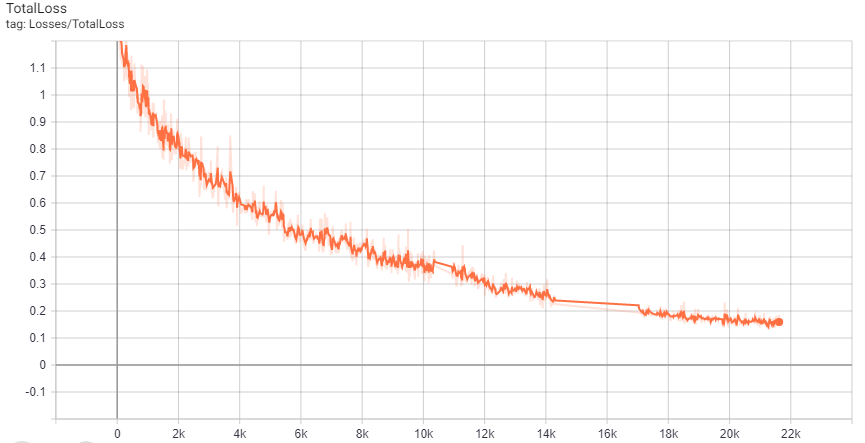

In [0]:

from IPython.display import Image
print('The graph of Training Loss vs Number of Steps')
Image(filename="/content/drive/My Drive/object_detection/loss/total_loss.PNG",width=600, height=400)

In [0]:
#export inference graph
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path='/content/drive/My Drive/object_detection/ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync.config' \
    --output_directory='/content/drive/My Drive/object_detection/outputEval/' \
    --trained_checkpoint_prefix='/content/drive/My Drive/object_detection/training/model.ckpt-21734'


W0724 04:52:18.496108 140031399688064 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0724 04:52:18.508490 140031399688064 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0724 04:52:18.520600 140031399688064 deprecation_wrapper.py:119] From /content/models/research/object_detection/export_inference_graph.py:162: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0724 04:52:18.521217 140031399688064 deprecation_wrapper.py:119] From /content/models/research/object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0724 04:52:18.530143 140031399688064 deprecation_wrapper.py:119] From /content/models/research/object_detection/exporter.py:381: T

#Testing

* Object detection in Images.

* Calculate Mean Average Precision for Test Images.
* Object detection in Videos.

In [0]:
####Testing##################
##Object detection in Images#############
###Test image path
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = pb_fname

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = directory + 'labelmap.pbtxt'

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
# PATH_TO_TEST_IMAGES_DIR =  os.path.join(repo_dir_path, "test")
PATH_TO_TEST_IMAGES_DIR = directory + 'VOC_test/JPEGImages/'

assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

##Test

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)

    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
    plt.savefig('/content/drive/My Drive/object_detection/VOC_test/resultImages/'+image_path.split('/')[7])

['/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007973.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007975.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007969.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007972.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007978.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007981.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007982.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007983.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007985.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007986.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007992.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007988.jpg', '/content/drive/My Drive/object_detection/VOC_test/JPEGImages/007989.jpg', '/content/drive/My Drive

W0724 05:21:24.610473 140036220442496 deprecation_wrapper.py:119] From /content/models/research/object_detection/utils/label_map_util.py:137: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [0]:
###model_main.py##########Evaluate the model, Calculates Mean Average Precision(mAP)
# Copyright 2017 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Binary to run train and evaluation on object detection model."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from absl import flags

import tensorflow as tf

from object_detection import model_hparams
from object_detection import model_lib

flags.DEFINE_string(
    'model_dir', output_directory, 'Path to output model directory '
    'where event and checkpoint files will be written.')
flags.DEFINE_string('pipeline_config_path', pipeline_config_path, 'Path to pipeline config '
                    'file.')
flags.DEFINE_integer('num_train_steps', 21606, 'Number of train steps.')
flags.DEFINE_boolean('eval_training_data', False,
                     'If training data should be evaluated for this job. Note '
                     'that one call only use this in eval-only mode, and '
                     '`checkpoint_dir` must be supplied.')
flags.DEFINE_integer('sample_1_of_n_eval_examples', 1, 'Will sample one of '
                     'every n eval input examples, where n is provided.')
flags.DEFINE_integer('sample_1_of_n_eval_on_train_examples', 5, 'Will sample '
                     'one of every n train input examples for evaluation, '
                     'where n is provided. This is only used if '
                     '`eval_training_data` is True.')
flags.DEFINE_string(
    'hparams_overrides', None, 'Hyperparameter overrides, '
    'represented as a string containing comma-separated '
    'hparam_name=value pairs.')
flags.DEFINE_string(
    'checkpoint_dir', ckpt_train_summary, 'Path to directory holding a checkpoint.  If '
    '`checkpoint_dir` is provided, this binary operates in eval-only mode, '
    'writing resulting metrics to `model_dir`.')
flags.DEFINE_boolean(
    'run_once', True, 'If running in eval-only mode, whether to run just '
    'one round of eval vs running continuously (default).'
)
FLAGS = flags.FLAGS


def main(unused_argv):
  flags.mark_flag_as_required('model_dir')
  flags.mark_flag_as_required('pipeline_config_path')
  config = tf.estimator.RunConfig(model_dir=FLAGS.model_dir)

  train_and_eval_dict = model_lib.create_estimator_and_inputs(
      run_config=config,
      hparams=model_hparams.create_hparams(FLAGS.hparams_overrides),
      pipeline_config_path=FLAGS.pipeline_config_path,
      train_steps=FLAGS.num_train_steps,
      sample_1_of_n_eval_examples=FLAGS.sample_1_of_n_eval_examples,
      sample_1_of_n_eval_on_train_examples=(
          FLAGS.sample_1_of_n_eval_on_train_examples))
  estimator = train_and_eval_dict['estimator']
  train_input_fn = train_and_eval_dict['train_input_fn']
  eval_input_fns = train_and_eval_dict['eval_input_fns']
  eval_on_train_input_fn = train_and_eval_dict['eval_on_train_input_fn']
  predict_input_fn = train_and_eval_dict['predict_input_fn']
  train_steps = train_and_eval_dict['train_steps']

  if FLAGS.checkpoint_dir:
    if FLAGS.eval_training_data:
      name = 'training_data'
      input_fn = eval_on_train_input_fn
    else:
      name = 'validation_data'
      # The first eval input will be evaluated.
      input_fn = eval_input_fns[0]
    if FLAGS.run_once:
      estimator.evaluate(input_fn,
                         steps=None,
                         checkpoint_path=tf.train.latest_checkpoint(
                             FLAGS.checkpoint_dir))
    else:
      model_lib.continuous_eval(estimator, FLAGS.checkpoint_dir, input_fn,
                                train_steps, name)
  else:
    train_spec, eval_specs = model_lib.create_train_and_eval_specs(
        train_input_fn,
        eval_input_fns,
        eval_on_train_input_fn,
        predict_input_fn,
        train_steps,
        eval_on_train_data=False)

    # Currently only a single Eval Spec is allowed.
    tf.estimator.train_and_evaluate(estimator, train_spec, eval_specs[0])


if __name__ == '__main__':
  tf.app.run()

W0723 18:14:44.693444 140528399189888 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0723 18:14:44.733525 140528399189888 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0723 18:14:44.747693 140528399189888 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

/usr/local/lib/python3.6/dist-packages/absl/flags/_validators.py:359: UserWarning: Flag --model_dir has a non-None default value; therefore, mark_flag_a

creating index...
index created!


I0723 18:23:34.452872 140526538163968 coco_tools.py:137] DONE (t=0.40s)


creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=35.94s).
Accumulating evaluation results...
DONE (t=11.71s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.431
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.653
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.468
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.091
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.264
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.536


I0723 18:24:23.516996 140528399189888 evaluation.py:275] Finished evaluation at 2019-07-23-18:24:23
I0723 18:24:23.518291 140528399189888 estimator.py:2039] Saving dict for global step 21734: DetectionBoxes_Precision/mAP = 0.43061623, DetectionBoxes_Precision/mAP (large) = 0.5355353, DetectionBoxes_Precision/mAP (medium) = 0.26420298, DetectionBoxes_Precision/mAP (small) = 0.09148839, DetectionBoxes_Precision/mAP@.50IOU = 0.6534835, DetectionBoxes_Precision/mAP@.75IOU = 0.46833286, DetectionBoxes_Recall/AR@1 = 0.3882452, DetectionBoxes_Recall/AR@10 = 0.5599929, DetectionBoxes_Recall/AR@100 = 0.58311653, DetectionBoxes_Recall/AR@100 (large) = 0.6980253, DetectionBoxes_Recall/AR@100 (medium) = 0.41527945, DetectionBoxes_Recall/AR@100 (small) = 0.18534847, Loss/classification_loss = 0.49325112, Loss/localization_loss = 0.1966276, Loss/regularization_loss = 0.1110175, Loss/total_loss = 0.80089325, global_step = 21734, learning_rate = 0.00195732, loss = 0.80089325
I0723 18:24:24.576564 1405

 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.388
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.560
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.583
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.185
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.415
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.698


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
########## install opencv#####
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [0]:
########Object detection in Videos##########
out = cv2.VideoWriter('/content/drive/My Drive/object_detection/VOC_test/output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (1280,720))

filename = '/content/drive/My Drive/object_detection/VOC_test/MarylandFarm.mp4'
cap = cv2.VideoCapture(filename)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        counter = 0
        while (True):
            ret, image_np = cap.read()
            
            counter += 1
            if ret:
              h = image_np.shape[0]
              w = image_np.shape[1]

              if counter % 1 == 0:
                image_np_expanded = np.expand_dims(image_np, axis=0)
                image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
                boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
                scores = detection_graph.get_tensor_by_name('detection_scores:0')
                classes = detection_graph.get_tensor_by_name('detection_classes:0')
                num_detections = detection_graph.get_tensor_by_name('num_detections:0')

                (boxes, scores, classes, num_detections) = sess.run(
                    [boxes, scores, classes, num_detections],
                    feed_dict={image_tensor: image_np_expanded})

                vis_util.visualize_boxes_and_labels_on_image_array(image_np,
                                                                     np.squeeze(boxes),
                                                                     np.squeeze(classes).astype(np.int32),
                                                                     np.squeeze(scores),
                                                                     category_index,
                                                                     use_normalized_coordinates=True,
                                                                     line_thickness=0,
                                                                     min_score_thresh=0.3)

              out.write(image_np)
            else:
              break
out.release()
cap.release()
cv2.destroyAllWindows()

#Results
**For Images:**\\
**VOC Test dataset** \\

The metric popularly used for evaluation in object detection are precision and recall.\\
Precision = True Positive / (True Positive + False Positive)
Recall = True Positive / (True Positive + False Negative)

Here mean Average Precision is used.
IOU is intersection over Union that is, IOU =  area of overlap / area of union

So, the results obtained in object detection on images are as follows:

After global step 21734: 
* DetectionBoxes_Precision/mAP = 43.061623 %,
* DetectionBoxes_Precision/mAP@.50IOU = 65.34835 %

The test images with detection boxes :


In [0]:
#@title
from IPython.display import Image
Image('/content/drive/My Drive/object_detection/loss/final_collage.jpg',width=1200,height=1100)

**For Videos:** \\

The following are the links to the videos on which the trained model has performed the object detection.
Despite the model was trained on Pascal VOC 2007 Dataset, it gave good results on the following videos which were taken from real life. \\


* https://drive.google.com/file/d/1A0RvNSH1p0SChYF4DhUS6KLIPbIDqAOW/view?usp=sharing 
* https://drive.google.com/file/d/1SjuH53p77jheoIygm2XTLYIHAJaNX7iK/view?usp=sharing
* https://drive.google.com/file/d/1rQP3GZJ6M1-E-McrpwDIKAALDioKsOzI/view?usp=sharing
